# Assignment 1: Principal Component Analysis (PCA)

## DTSC-680: Applied Machine Learning

## Name:


### Overview

In this assignment, you will import a high dimensional dataset and reduce the dimensions of the data in order to visualize the clusters that exist within the data. You will use both PCA and t-SNE to perform dimensionality reduction.

In [2]:
# common imports
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Data Prep

The penguins dataset is included in the `penguins.csv` file. Read the penguins data into a pandas DataFrame called `penguins`. To ensure compatibility across different operating systems, make sure to use the encoding='utf-8' parameter.

In [3]:
import pandas as pd

penguins = pd.read_csv('penguins.csv', encoding='utf-8')

Before we can perform any dimensionality reduction or Machine Learning task, the data needs to be cleaned. Perform the following data cleaning and preprocessing tasks:
- Drop any rows containing NULL values.
- Use scikit-learn's [`Label Encoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to encode the categorical columns to numerical values.
- Split the data into a Series called `species` containing the species column and the `penguins` dataframe containing all of the other columns.

In [4]:
from sklearn.preprocessing import LabelEncoder

# Drop any rows containing NULL values.
penguins.dropna(inplace=True)

In [5]:
# Encode categorical columns to numerical values.
categorical_columns = penguins.select_dtypes(include=['object']).columns

# Instantiate the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    penguins[col] = le.fit_transform(penguins[col])


In [6]:
# Split the data into the target (species) and the remaining features.
species = penguins['species']      
penguins = penguins.drop(columns=['species'])  # The remaining DataFrame contains all other features.

### Reduce Dimensions for Visualization Using PCA

Use PCA to reduce the dimensions of the dataset so that the clusters can be visualized. Call the PCA'ed dataframe `pca_penguins`, setting the random state to 0. Then, run the cell below to plot the PCA'ed data. Lastly, store the array containing the explained variance ratio as `exp_variance`. 

In [35]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce the dataset to 2 components, setting random_state to 0 for reproducibility.
pca = PCA(n_components=2, random_state=0)

# Fit PCA on the feature dataframe and transform it.
pca_penguins = pca.fit_transform(penguins)

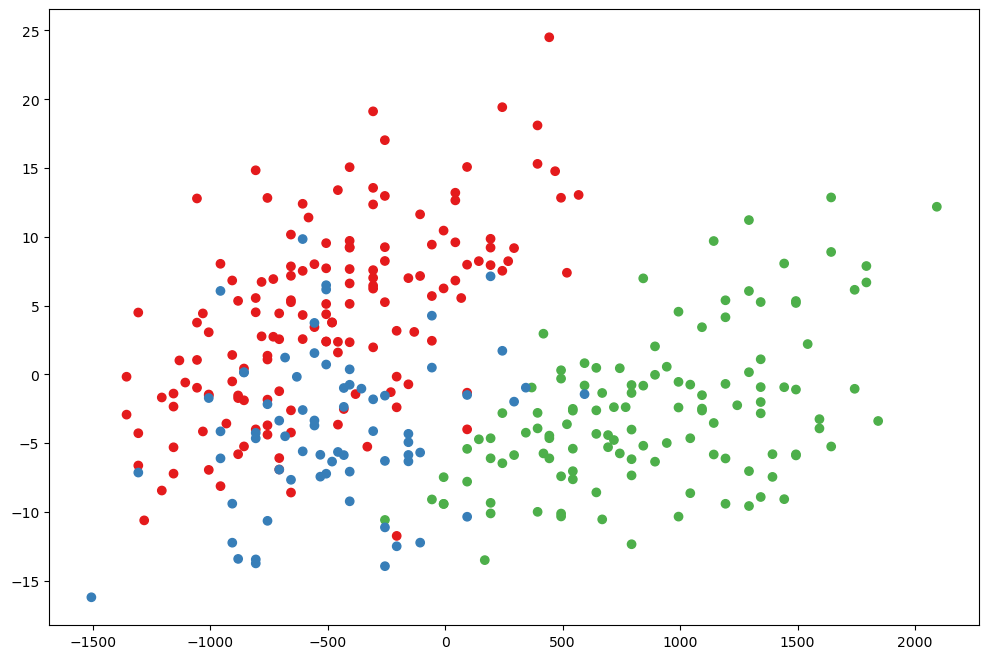

In [37]:
# CODE PROVIDED
plt.figure(figsize=(12, 8))
plt.scatter(pca_penguins[:, 0], pca_penguins[:, 1], c=species, cmap=plt.colormaps['Set1'])
plt.clim(-0.5, 9.5)

In [39]:
exp_variance = pca.explained_variance_ratio_

### Reduce Dimensions for Visualization Using t-SNE

Now, use t-SNE to perform the same dimensionality reduction. Call the t-SNE'ed dataframe `tsne_penguins` setting the random state to 0, and then run the cell below to plot the t-SNE'ed data.

In [41]:
from sklearn.manifold import TSNE

# Initialize t-SNE to reduce the dataset to 2 dimensions, setting random_state to 0 for reproducibility.
tsne = TSNE(n_components=2, random_state=0)

# Fit t-SNE on the feature dataframe and transform it.
tsne_penguins = tsne.fit_transform(penguins)

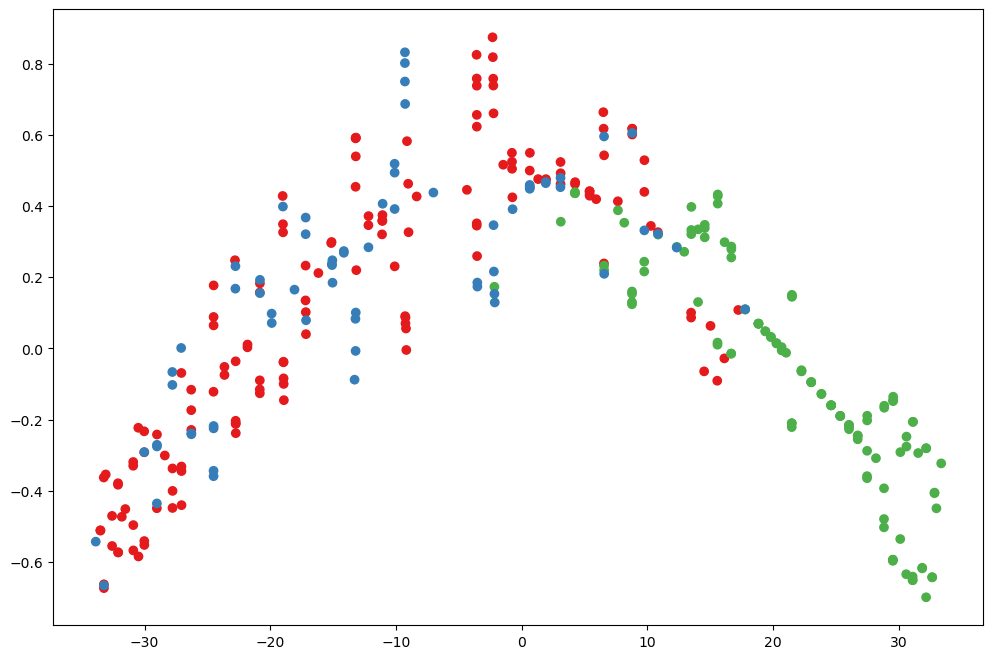

In [42]:
# CODE PROVIDED
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.scatter(tsne_penguins[:, 0], tsne_penguins[:, 1], c=species, cmap=plt.colormaps['Set1'])
plt.clim(-0.5, 9.5)

### Reduce Dimensions for Visualization Using PCA and t-SNE

Finally, use t-SNE to perform dimensionality reduction on the PCA'ed penguins data. Call this dataframe `pca_tsne_penguins` and run the following cell to plot the new data.

In [45]:
# Initialize t-SNE to reduce the PCA'ed data to 2 components, setting random_state to 0 for reproducibility.
tsne = TSNE(n_components=2, random_state=0)

# Fit t-SNE on the PCA-transformed data and transform it.
pca_tsne_penguins = tsne.fit_transform(pca_penguins)

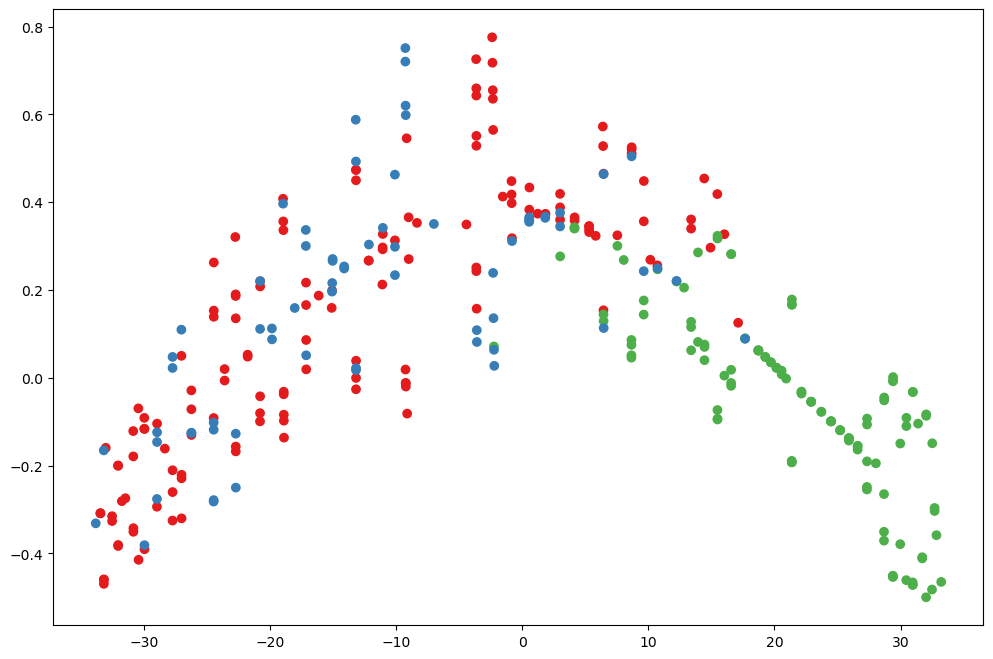

In [47]:
# CODE PROVIDED
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.scatter(pca_tsne_penguins[:, 0], pca_tsne_penguins[:, 1], c=species, cmap=plt.colormaps['Set1'])
plt.clim(-0.5, 9.5)

Take a minute to look at the three plots. Which plot seperates the clusters most clearly?

### Export cleaned penguins dataset for codegrade evaluation
Using the "pickle" library:

Export the cleaned penguins dataset as "cleaned_peguins.pkl".

In [ ]:
# CODE PROVIDED
import pickle

#Save dataset to file
with open('cleaned_penguins.pkl', 'wb') as file:
    pickle.dump(penguins , file)   ## --> MAKE SURE TO EXPORT THE RIGHT DATASET

### Export Models for codegrade evaluation
Using the "pickle" library:

Export the models as "pca_penguins.pkl", "pca_tsne_penguins.pkl" and "tsne_penguins".

In [ ]:
# CODE PROVIDED
#Save PCA MODEL to file
with open('pca_penguins.pkl', 'wb') as file:
    pickle.dump(pca_penguins , file)   ## --> MAKE SURE TO EXPORT THE RIGHT MODEL

#Save TSNE_PCA MODEL to file
with open('pca_tsne_penguins.pkl', 'wb') as file:
    pickle.dump(pca_tsne_penguins , file)   ## --> MAKE SURE TO EXPORT THE RIGHT MODEL

#Save TSE MODEL to file
with open('tsne_penguins.pkl', 'wb') as file:
    pickle.dump(tsne_penguins , file)   ## --> MAKE SURE TO EXPORT THE RIGHT MODEL